<a href="https://colab.research.google.com/github/HarshiniNetha/Project/blob/main/Harshini_Final_Code_Final_Bkp_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas
import os
from matplotlib import pyplot as ckvs
import seaborn as cksb
from IPython.display import display, HTML
from plotly import express
from sklearn import preprocessing, decomposition, feature_selection
from sklearn import ensemble, neural_network, linear_model
from sklearn import naive_bayes
from sklearn import svm, tree,neighbors
from sklearn import preprocessing
from sklearn import pipeline
import sklearn, pickle, datetime
!pip install ucimlrepo
from sklearn import utils
from sklearn import model_selection
from sklearn import metrics
from ucimlrepo import fetch_ucirepo

In [2]:
def DataRead():
    dr=os.getcwd()
    if "CKD_Data.csv" not in os.listdir():
        data = fetch_ucirepo(id=336)
        dtck=pandas.concat([data.data.features,data.data.targets],axis=1)
        dtck.to_csv("CKD_Data.csv")
        print("------------------------")
        print("     Records: {}\n     Features: {}".format(dtck.shape[0],dtck.shape[1]))
        print("------------------------")
        return dtck
    else:
        dtck=pandas.read_csv("CKD_Data.csv")
        if 'Unnamed: 0' in dtck.columns:
            dtck=dtck.drop('Unnamed: 0',axis=1)
        print("------------------------")
        print("     Records: {}\n     Features: {}".format(dtck.shape[0],dtck.shape[1]))
        print("------------------------")
        return dtck
KDS=DataRead()
KDS.head()

------------------------
     Records: 400
     Features: 25
------------------------


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
def InfoData(dtck):
    resval1=len(dtck)
    print("\nData Information\n")
    print(dtck.info(),"\n")
    print("\nData Statistics\n")
    display(HTML(dtck.describe().to_html()))
    return dtck
KDS=InfoData(KDS)


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [4]:
def DataCleaning(dtck):
    data_length_init=len(dtck)
    if sum(dtck.isna().sum())>0:
        print("\nMissing Values Found!!\n")
        print(dtck.isna().sum())
        print("\nCleaning.....\n")
        dtck=dtck.dropna()
        data_length_after=len(dtck)
        dtck=utils.resample(dtck,replace = True, n_samples = int(len(dtck)*(data_length_init/data_length_after)), random_state = 10)
        print("\nMissing Values Status after cleaning\n")
        print(dtck.isna().sum())
        print(dtck.info())
        dtck=dtck.reset_index(drop=True)
    return dtck
KDS=DataCleaning(KDS)
KDS.head()


Missing Values Found!!

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Cleaning.....


Missing Values Status after cleaning

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 71 to 396
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,ckd
1,73.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,118.0,...,45.0,9300.0,4.7,no,no,no,good,no,no,notckd
2,71.0,70.0,1.010,3.0,0.0,normal,abnormal,present,present,219.0,...,33.0,5600.0,3.6,yes,yes,yes,good,no,no,ckd
3,56.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,139.0,...,42.0,5600.0,5.5,no,no,no,good,no,no,notckd
4,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40.0,9900.0,4.7,no,no,no,good,no,no,notckd


In [5]:
def RectifyFet(dtck):
    dtck['class']=dtck['class'].replace("ckd\t","ckd")
    return dtck
KDS=RectifyFet(KDS)
print(KDS['class'].value_counts())
KDS.head()

class
notckd    289
ckd       111
Name: count, dtype: int64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,ckd
1,73.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,118.0,...,45.0,9300.0,4.7,no,no,no,good,no,no,notckd
2,71.0,70.0,1.010,3.0,0.0,normal,abnormal,present,present,219.0,...,33.0,5600.0,3.6,yes,yes,yes,good,no,no,ckd
3,56.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,139.0,...,42.0,5600.0,5.5,no,no,no,good,no,no,notckd
4,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40.0,9900.0,4.7,no,no,no,good,no,no,notckd


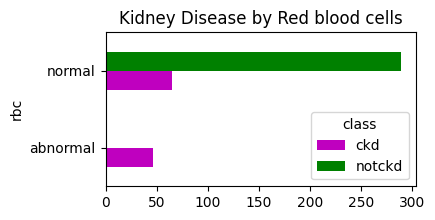

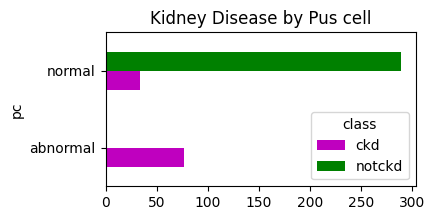

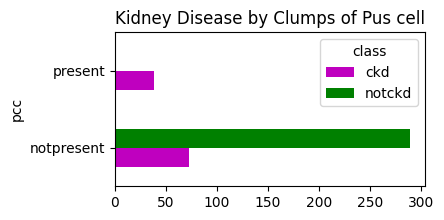

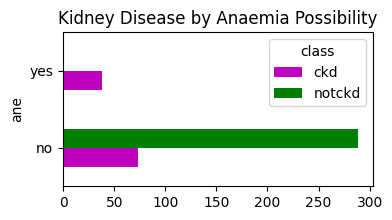

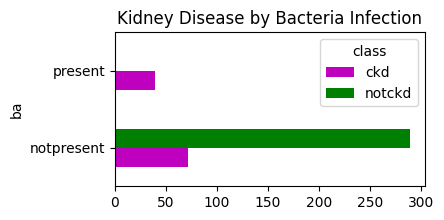

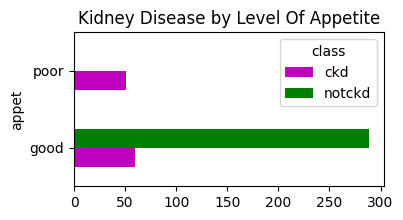

In [6]:
def CatGraph(dtck,ft,nm):
    pandas.crosstab(dtck[ft],dtck['class']).plot(kind='barh',figsize=(4,2), color=['m','g'],title="Kidney Disease by {}".format(nm))
cat_fets=["rbc","pc","pcc","ane","ba","appet"]
names=["Red blood cells", "Pus cell", "Clumps of Pus cell", "Anaemia Possibility","Bacteria Infection", "Level Of Appetite"]
for cf in range(len(cat_fets)):
    CatGraph(KDS,cat_fets[cf],names[cf])

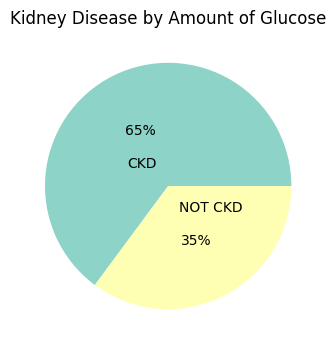

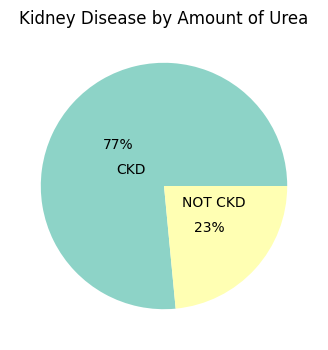

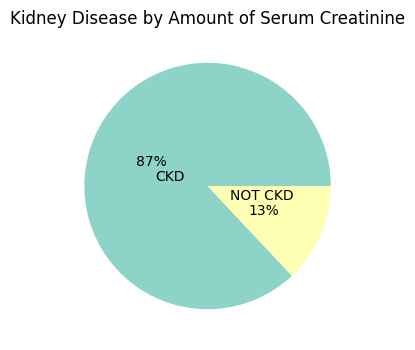

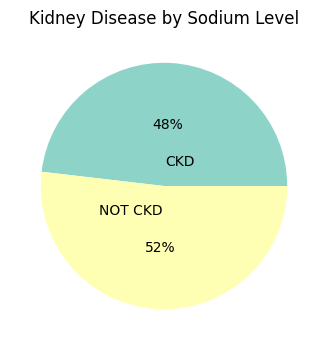

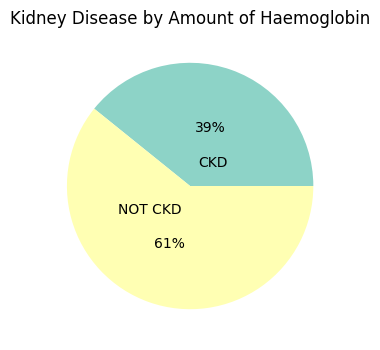

In [7]:
def NumGraph(dtck,ft, nm):
    kdnyclass=dtck[dtck['class']=='ckd']
    hltyclass=dtck[dtck['class']=='notckd']
    ckvs.figure(figsize=(4,4))
    ckvs.title("Kidney Disease by {}".format(nm))
    ckvs.pie([kdnyclass[ft].mean(),hltyclass[ft].mean()],labels=["CKD","NOT CKD"],
                         colors=cksb.color_palette('Set3'), autopct='%1.0f%%',pctdistance=0.5, labeldistance=0.2)
    ckvs.show()
num_fets=["bgr","bu","sc","sod","hemo"]
names=["Amount of Glucose", "Amount of Urea", "Amount of Serum Creatinine", "Sodium Level", "Amount of Haemoglobin"]
for nf in range(len(num_fets)):
    NumGraph(KDS,num_fets[nf], names[nf])

In [8]:
def DataEncoding(dtck):
    dtcktg=dtck['class']
    dtck1=dtck.drop('class',axis=1)
    dtckcat=dtck1.dtypes[dtck1.dtypes=='object'].index.tolist()
    for k in range(len(dtckcat)):
        dtck1[dtckcat[k]]=dtck1[dtckcat[k]].replace(dtck1[dtckcat[k]].unique(),[x for x in range(len(dtck1[dtckcat[k]].unique()))])
    dtck2=pandas.concat([dtck1,dtcktg],axis=1)
    return dtck2
ECKDS=DataEncoding(KDS)
ECKDS.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,46.0,60.0,1.010,1.0,0.0,0,0,0,0,163.0,...,28.0,14600.0,3.2,0,0,0,0,0,0,ckd
1,73.0,80.0,1.025,0.0,0.0,0,0,0,0,118.0,...,45.0,9300.0,4.7,1,1,0,0,0,0,notckd
2,71.0,70.0,1.010,3.0,0.0,0,1,1,1,219.0,...,33.0,5600.0,3.6,0,0,1,0,0,0,ckd
3,56.0,80.0,1.025,0.0,0.0,0,0,0,0,139.0,...,42.0,5600.0,5.5,1,1,0,0,0,0,notckd
4,29.0,80.0,1.020,0.0,0.0,0,0,0,0,83.0,...,40.0,9900.0,4.7,1,1,0,0,0,0,notckd


In [9]:
def PCACK(dtck,n,w,h,col,TX):
    arrdtck=numpy.array(dtck.iloc[:,:-1])
    pcdtck = decomposition.PCA(n_components=n)
    pcdtck.fit(arrdtck)
    pcdtckcm=["Comp-{}".format(i+1) for i in range(len(pcdtck.explained_variance_ratio_.tolist()))]
    ckvs.figure(figsize=(w,h))
    ckvs.title("Variance(PCA={})\n{} Normalization Data\nMaximum Variance Value: {}".format(n,TX,round(max(pcdtck.explained_variance_ratio_),8)),fontsize=18)
    ckvs.bar(pcdtckcm,pcdtck.explained_variance_ratio_.tolist(),width=0.5,color=col)
    ckvs.xlabel("PCA",fontsize=14)
    ckvs.ylabel("Variance",fontsize=14)
    ckvs.grid()
    ckvs.show()
    return pcdtck.explained_variance_ratio_

def DataScale(dtck):
    ssnorm = preprocessing.StandardScaler()
    ckscl=ssnorm.fit_transform(dtck)
    return ckscl

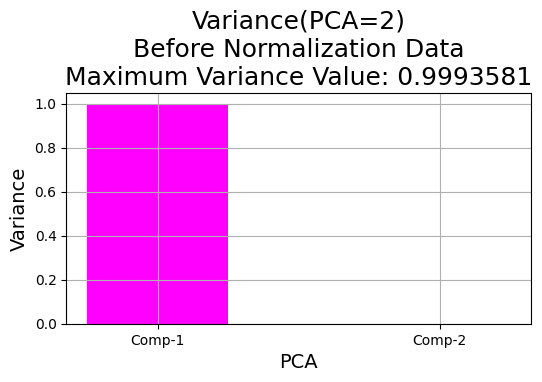

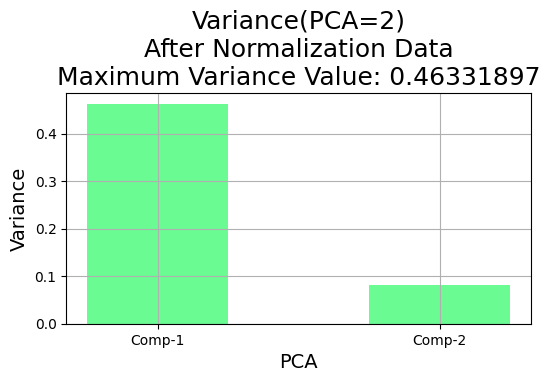

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.161561,-1.293578,-1.681623,0.113516,-0.323103,-0.360477,-0.488252,-0.323994,-0.328684,0.459521,...,-1.476116,1.850549,-1.653822,-1.984508,-2.152627,-0.279584,-0.382272,-0.390817,-0.323994,ckd
1,1.540745,0.551097,0.991155,-0.574460,-0.323103,-0.360477,-0.488252,-0.323994,-0.328684,-0.228900,...,0.347905,0.245392,-0.176096,0.503903,0.464549,-0.279584,-0.382272,-0.390817,-0.323994,notckd
2,1.414648,-0.371241,-1.681623,1.489468,-0.323103,-0.360477,2.048122,3.086473,3.042435,1.316223,...,-0.939639,-0.875189,-1.259761,-1.984508,-2.152627,3.576745,-0.382272,-0.390817,-0.323994,ckd
3,0.468922,0.551097,0.991155,-0.574460,-0.323103,-0.360477,-0.488252,-0.323994,-0.328684,0.092363,...,0.026019,-0.875189,0.612025,0.503903,0.464549,-0.279584,-0.382272,-0.390817,-0.323994,notckd
4,-1.233384,0.551097,0.100229,-0.574460,-0.323103,-0.360477,-0.488252,-0.323994,-0.328684,-0.764339,...,-0.188572,0.427108,-0.176096,0.503903,0.464549,-0.279584,-0.382272,-0.390817,-0.323994,notckd


In [10]:
pcvl=[]
pcvl.append(PCACK(ECKDS.drop('class',axis=1),2,6,3,"#FF00FF","Before"))

outvl=[]
for pv in pcvl:
    for p in pv:
        if p>0.6:
            outvl.append(True)
if len(outvl)==1 and True in outvl:
    ScKDSdt=DataScale(ECKDS.drop('class',axis=1))
ScKDS=pandas.DataFrame(ScKDSdt,columns=ECKDS.drop('class',axis=1).columns.tolist())
ScKDS['class']=ECKDS['class']
PCACK(ScKDS[::-1],2,6,3,"#6AFB92","After")
ScKDS.head()

In [ ]:
def CKF1(dtck):
    Xdtck=dtck.drop([dtck.columns.tolist()[-1]],axis=1)
    Ydtck=dtck[dtck.columns.tolist()[-1]]
    nmft=Xdtck.columns.tolist()
    ckensm = ensemble.RandomForestClassifier(random_state=0)
    ckensm.fit(Xdtck, Ydtck)
    impck = ckensm.feature_importances_
    ftsckdf=pandas.DataFrame({"Feature":nmft,"Importance":impck})
    ftsckdf1=ftsckdf[ftsckdf['Importance']>0.01]
    ckvs.figure(figsize=(7,3))
    ckvs.bar(ftsckdf1['Feature'],ftsckdf1['Importance'])
    ckvs.title("Feature Importance",fontsize=20,color="b")
    ckvs.xlabel("Features",fontsize=17,color="b")
    ckvs.ylabel("Importance",fontsize=17,color="b")
    ckvs.xticks(rotation=90)
    ckvs.grid()
    ckvs.show()
    display(HTML(ftsckdf1.to_html()))
    print("Total Features Selecetd Using Ensemble: {}".format(len(ftsckdf1)))
    return ftsckdf1['Feature'].tolist()

In [ ]:
def CKF2(dtck):
    print("--------------------------------------------------------------")
    print("Feature Selection for the Data using RFE")
    print("--------------------------------------------------------------")
    Xdtck=dtck.drop([dtck.columns.tolist()[-1]],axis=1)
    Ydtck=dtck[dtck.columns.tolist()[-1]]
    Ydtck=Ydtck.replace(Ydtck.unique(),[x for x in range(len(Ydtck.unique()))])
    M2 = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = int(len(Xdtck.columns)*0.6), step = 0.7)
    M2Trnd=M2.fit(Xdtck,Ydtck)
    print("--------------------------------------------------------------")
    ftrfe=pandas.DataFrame({"Feature":Xdtck.columns,"Ranking":M2Trnd.ranking_})
    ftrfe2=ftrfe[ftrfe['Ranking']==1]
    print("Total Features Selecetd Using RFE: {}".format(len(ftrfe2)))
    display(HTML(ftrfe2.to_html()))
    return ftrfe2['Feature'].tolist()

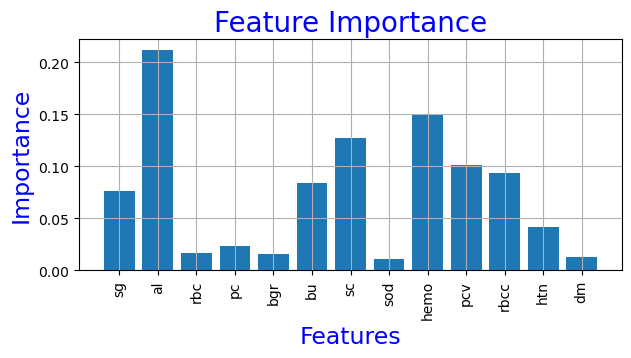

,Feature,Importance
2,sg,0.076346
3,al,0.211244
5,rbc,0.016381
6,pc,0.023733
9,bgr,0.015970
10,bu,0.084176
11,sc,0.126828
12,sod,0.010635
14,hemo,0.149558
15,pcv,0.101016


Total Features Selecetd Using Ensemble: 13
--------------------------------------------------------------
Feature Selection for the Data using RFE
--------------------------------------------------------------
--------------------------------------------------------------
Total Features Selecetd Using RFE: 14


,Feature,Ranking
2,sg,1
3,al,1
4,su,1
5,rbc,1
6,pc,1
7,pcc,1
9,bgr,1
10,bu,1
11,sc,1
12,sod,1


In [ ]:
kdsfets=[]
ensft=CKF1(ScKDS)
rfft=CKF2(ScKDS)
for x in ensft:
    if x in rfft:
        kdsfets.append(x)

In [ ]:
print("Features Selected Using Ensemble\n",*ensft, sep="\n")
print("Features Selected Using RFE\n",*rfft, sep="\n")

Features Selected Using Ensemble

sg
al
rbc
pc
bgr
bu
sc
sod
hemo
pcv
rbcc
htn
dm
Features Selected Using RFE

sg
al
su
rbc
pc
pcc
bgr
bu
sc
sod
hemo
pcv
wbcc
htn


In [ ]:
print("Features Selected Using Hybrid\n",*kdsfets, sep="\n")
print("Total Features Selecetd Using Hybrid: ",len(kdsfets))

Features Selected Using Hybrid

sg
al
rbc
pc
bgr
bu
sc
sod
hemo
pcv
htn
Total Features Selecetd Using Hybrid:  11


In [ ]:
X=ECKDS.drop('class',axis=1)
X=X[kdsfets]
y=ECKDS['class']
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y, train_size=0.8, random_state=10)
print(y_test.value_counts())
print("\n")
print(y_train.value_counts())

class
notckd    58
ckd       22
Name: count, dtype: int64


class
notckd    231
ckd        89
Name: count, dtype: int64


In [ ]:
X

,sg,al,rbc,pc,bgr,bu,sc,sod,hemo,pcv,htn
0,1.010,1.0,0,0,163.0,92.0,3.3,141.0,9.8,28.0,0
1,1.025,0.0,0,0,118.0,44.0,0.7,137.0,14.8,45.0,1
2,1.010,3.0,0,1,219.0,82.0,3.6,133.0,10.4,33.0,0
3,1.025,0.0,0,0,139.0,15.0,1.2,135.0,14.8,42.0,1
4,1.020,0.0,0,0,83.0,49.0,0.9,139.0,17.5,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0,0,91.0,36.0,0.7,135.0,14.0,46.0,1
396,1.025,0.0,0,0,88.0,16.0,1.1,147.0,16.4,53.0,1
397,1.020,0.0,0,0,95.0,24.0,0.8,145.0,15.0,52.0,1
398,1.020,0.0,0,0,104.0,28.0,0.9,142.0,17.3,52.0,1


In [ ]:
CCC=[
    ensemble.RandomForestClassifier(),
    neural_network.MLPClassifier(),
    naive_bayes.MultinomialNB(),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    neighbors.KNeighborsClassifier()
]
print(*CCC, sep="\n")

RandomForestClassifier()
MLPClassifier()
MultinomialNB()
LinearSVC()
DecisionTreeClassifier()
KNeighborsClassifier()


In [ ]:
CkModelInit=[
    ensemble.RandomForestClassifier(),
    neural_network.MLPClassifier(),
    naive_bayes.MultinomialNB(),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    neighbors.KNeighborsClassifier()
]
ackmdnm=[
    "Random Forest",
    "MLP Classifier",
    "Naive Bayes",
    "Decision Tree Classifier",
    "Support Vector Classifier",
    "K-Neighbors"
]


CkModelInitopt=CkModelInit.copy()
optmkd=[
    [{"min_weight_fraction_leaf":[0.4,0.5,0.6]}],
    [{"hidden_layer_sizes":[1,2,3],"max_iter":[1,2]}],
    [{"alpha":[0.6,0.8,1.0],"fit_prior":[False]}],
    [{"tol":[0.01,0.001,0.0001,0.00001],'C':[0.2,0.4,0.6,0.8,1.0],"max_iter":[2,3,4]}],
    [{"criterion":['entropy'],"min_weight_fraction_leaf":[0.3,0.4,0.5]}],
    [{"n_neighbors":[3,4,5],"algorithm":['auto', 'ball_tree', 'kd_tree']}]
]
optparams=[]
for lg in range(len(CkModelInitopt)):
    print("____________________________________________________")
    print("Tuning {}".format(ackmdnm[lg]))
    print("____________________________________________________")
    optgs = model_selection.GridSearchCV(CkModelInitopt[lg], optmkd[lg], cv = 5, scoring='accuracy')
    optgs.fit(x_train,y_train)
    CkModelInitopt[lg]=optgs.best_estimator_
    optparams.append(optgs.best_estimator_)
    print("____________________________________________________")
    print("{} Tuning Complete".format(ackmdnm[lg]))
    print("____________________________________________________")
dataoptm=pandas.DataFrame({"Model":ackmdnm,"Optimized Version":optparams})
dataoptm.to_csv("OptModels.csv")
CkModelInitopt

____________________________________________________
Tuning Random Forest
____________________________________________________
____________________________________________________
Random Forest Tuning Complete
____________________________________________________
____________________________________________________
Tuning MLP Classifier
____________________________________________________
____________________________________________________
MLP Classifier Tuning Complete
____________________________________________________
____________________________________________________
Tuning Naive Bayes
____________________________________________________
____________________________________________________
Naive Bayes Tuning Complete
____________________________________________________
____________________________________________________
Tuning Decision Tree Classifier
____________________________________________________
____________________________________________________
Decision Tree Classifi

[RandomForestClassifier(min_weight_fraction_leaf=0.4),
 MLPClassifier(hidden_layer_sizes=1, max_iter=2),
 MultinomialNB(alpha=0.6, fit_prior=False),
 LinearSVC(C=0.2, max_iter=4, tol=0.01),
 DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.3),
 KNeighborsClassifier(n_neighbors=3)]

In [ ]:
dataoptm

,Model,Optimized Version
0,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', m..."
1,MLP Classifier,"MLPClassifier(hidden_layer_sizes=1, max_iter=2)"
2,Naive Bayes,"MultinomialNB(alpha=0.6, fit_prior=False)"
3,Decision Tree Classifier,"LinearSVC(C=0.2, max_iter=4, tol=0.01)"
4,Support Vector Classifier,"DecisionTreeClassifier(criterion='entropy', mi..."
5,K-Neighbors,KNeighborsClassifier(n_neighbors=3)


In [ ]:
MetCKInit=[[],[],[],[],[]]
print("_____________________________________________________________________________")
for i in range(len(CkModelInit)):
    print("                            {} ".format(ackmdnm[i]))
    print("_____________________________________________________________________________")
    ScMetLp=[[],[],[],[],[],[]]
    for ts in range(10):
        t1 = datetime.datetime.now()
        CkModelInit[i].fit(x_train,y_train)
        kidprd=CkModelInit[i].predict(x_test)
        t2 = datetime.datetime.now()
        delta = t2 - t1
        time_pred=delta.total_seconds()
        ScMetLp[0].append(round(metrics.accuracy_score(y_test,kidprd)*100,2))
        ScMetLp[1].append(round(metrics.precision_score(y_test, kidprd, average='weighted'),2)*100)
        ScMetLp[2].append(round(metrics.recall_score(y_test, kidprd, average='weighted'),2)*100)
        ScMetLp[3].append(round(metrics.f1_score(y_test, kidprd, average='weighted'),2)*100)
        cm=pandas.crosstab(y_test, kidprd, rownames=['True'], colnames=['Predicted'], margins=True)
        ScMetLp[4].append(cm.iloc[:2,:2])
        ScMetLp[5].append(time_pred)
    opt_idx=ScMetLp[0].index(max(ScMetLp[0]))
    MetCKInit[0].append(ScMetLp[0][opt_idx])
    MetCKInit[1].append(ScMetLp[1][opt_idx])
    MetCKInit[2].append(ScMetLp[2][opt_idx])
    MetCKInit[3].append(ScMetLp[3][opt_idx])
    MetCKInit[4].append(ScMetLp[5][opt_idx])
    print("\nAccuracy: {}%\n".format(ScMetLp[0][opt_idx]))
    print("\nClassification Report for {} \n\n{}".format(ackmdnm[i],metrics.classification_report(y_test, kidprd)))
    print("\nConfusion Matrix for {} \n\n{}\n".format(ackmdnm[i],ScMetLp[4][opt_idx]))
    print("_____________________________________________________________________________")

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________

Accuracy: 100.0%


Classification Report for Random Forest 

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        22
      notckd       1.00      1.00      1.00        58

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix for Random Forest 

Predicted  ckd  notckd
True                  
ckd         22       0
notckd       0      58

_____________________________________________________________________________
                            MLP Classifier 
_____________________________________________________________________________

Accuracy: 98.75%


Classification Report for MLP Classifier 

              prec

In [ ]:
ResInitCKD=pandas.DataFrame({
    "Classifiers":ackmdnm,
    "Accuracy":MetCKInit[0],
    "Precision":MetCKInit[1],
    "Recall":MetCKInit[2],
    "F1-Score":MetCKInit[3],
    "Execution Time":MetCKInit[4]
})

for i in ResInitCKD.columns.tolist()[1:]:
    ResInitCKD=ResInitCKD.sort_values(by=i,ascending=False)
    fig = express.bar(ResInitCKD, y=i, x="Classifiers",text=i,color="Classifiers",
                 title="{}(Unfiltered)".format(i),height=400,width=600)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=15,
            color="black"
        )
    )
    fig.show()


ResInitCKD1=ResInitCKD[ResInitCKD['Accuracy']<100].reset_index(drop=True)

for i in ResInitCKD1.columns.tolist()[1:]:
    ResInitCKD1=ResInitCKD1.sort_values(by=i,ascending=False)
    fig = express.bar(ResInitCKD1, y=i, x="Classifiers",text=i,color="Classifiers",
                 title="{}(Filtered)".format(i),height=400,width=600)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=15,
            color="black"
        )
    )
    fig.show()

In [ ]:
pickle.dump(CkModelInitopt[3], open("KIDOPT.sav", 'wb'))
CkModelInitopt[3]

In [ ]:
ResInitCKD

In [ ]:
ResInitCKD1

In [ ]:
kdopt=CkModelInitopt[3]
kdopt.fit(X,y)
print("Optimum Model\n",ResInitCKD1['Classifiers'][4])
optmd = 'kdopt.sav'
pickle.dump(kdopt, open(optmd, 'wb'))
print("\nOptimum Model Structure:\n")
kdopt

In [ ]:
expdata=pandas.concat([X,y],axis=1)
expdata.to_csv("expdata.csv")
expdata